Importo las librerías a utilizar

In [665]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn import tree


Abro los datasets  para realizar un análisis exploratorio general de mis datos.

In [666]:
hospitalizaciones_test=pd.read_csv("./datasets/hospitalizaciones_test.csv")
hospitalizaciones_train=pd.read_csv("./datasets/hospitalizaciones_train.csv")

Comienzo un análisis general de mis datasets para saber cuántos datos faltantes (None/NaN/null) y datos repetidos se encuentran

In [667]:
hospitalizaciones_test.head(5)

,Available Extra Rooms in Hospital,Department,Ward_Facility_Code,doctor_name,staff_available,patientid,Age,gender,Type of Admission,Severity of Illness,health_conditions,Visitors with Patient,Insurance,Admission_Deposit
0,3,gynecology,F,Dr Olivia,10,2858,21-30,Female,Trauma,Moderate,Other,2,No,4749.640225
1,2,TB & Chest disease,E,Dr John,4,65657,51-60,Female,Trauma,Moderate,Asthama,2,Yes,4122.261324
2,2,radiotherapy,E,Dr John,7,45598,51-60,Other,Trauma,Moderate,None,3,No,5459.067882
3,2,gynecology,F,Dr Olivia,1,31132,21-30,Female,Trauma,Moderate,None,2,Yes,3987.033318
4,2,anesthesia,A,Dr John,7,125021,51-60,Female,Trauma,Extreme,Diabetes,2,No,4770.789695


In [668]:
hospitalizaciones_train.head()#El que deben usar para entrenar el modelo

,Available Extra Rooms in Hospital,Department,Ward_Facility_Code,doctor_name,staff_available,patientid,Age,gender,Type of Admission,Severity of Illness,health_conditions,Visitors with Patient,Insurance,Admission_Deposit,Stay (in days)
0,4,gynecology,D,Dr Sophia,0,33070,41-50,Female,Trauma,Extreme,Diabetes,4,Yes,2966.408696,8
1,4,gynecology,B,Dr Sophia,2,34808,31-40,Female,Trauma,Minor,Heart disease,2,No,3554.835677,9
2,2,gynecology,B,Dr Sophia,8,44577,21-30,Female,Trauma,Extreme,Diabetes,2,Yes,5624.733654,7
3,4,gynecology,D,Dr Olivia,7,3695,31-40,Female,Urgent,Moderate,None,4,No,4814.149231,8
4,2,anesthesia,E,Dr Mark,10,108956,71-80,Male,Trauma,Moderate,Diabetes,2,No,5169.269637,34


In [669]:
hospitalizaciones_train.describe()

,Available Extra Rooms in Hospital,staff_available,patientid,Visitors with Patient,Admission_Deposit,Stay (in days)
count,410000.000000,410000.000000,410000.000000,410000.000000,410000.000000,410000.000000
mean,3.639376,5.020946,63095.940020,3.552520,4723.419239,12.378193
std,2.701702,3.158018,41686.175937,2.247459,1047.420292,7.905618
min,0.000000,0.000000,-3146.000000,0.000000,1654.005148,3.000000
25%,2.000000,2.000000,25405.000000,2.000000,4072.638351,8.000000
50%,3.000000,5.000000,57736.000000,3.000000,4627.488745,9.000000
75%,4.000000,8.000000,103278.250000,4.000000,5092.349430,11.000000
max,24.000000,10.000000,134400.000000,32.000000,10104.726390,51.000000


In [670]:
hospitalizaciones_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 410000 entries, 0 to 409999
Data columns (total 15 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Available Extra Rooms in Hospital  410000 non-null  int64  
 1   Department                         410000 non-null  object 
 2   Ward_Facility_Code                 410000 non-null  object 
 3   doctor_name                        410000 non-null  object 
 4   staff_available                    410000 non-null  int64  
 5   patientid                          410000 non-null  int64  
 6   Age                                410000 non-null  object 
 7   gender                             410000 non-null  object 
 8   Type of Admission                  410000 non-null  object 
 9   Severity of Illness                410000 non-null  object 
 10  health_conditions                  410000 non-null  object 
 11  Visitors with Patient              4100

In [671]:
hospitalizaciones_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90000 entries, 0 to 89999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Available Extra Rooms in Hospital  90000 non-null  int64  
 1   Department                         90000 non-null  object 
 2   Ward_Facility_Code                 90000 non-null  object 
 3   doctor_name                        90000 non-null  object 
 4   staff_available                    90000 non-null  int64  
 5   patientid                          90000 non-null  int64  
 6   Age                                90000 non-null  object 
 7   gender                             90000 non-null  object 
 8   Type of Admission                  90000 non-null  object 
 9   Severity of Illness                90000 non-null  object 
 10  health_conditions                  90000 non-null  object 
 11  Visitors with Patient              90000 non-null  int

LOS DATASETS ESTAN COMPLETOS ASI QUE NO HAY QUE COMPLETAR CON DATOS 

Me deshago de las columnas que no aportan a mi modelo
Para muchas de estas me guie unicamente por logica. 

In [672]:
hospitalizaciones_train.drop(columns=['doctor_name','patientid','Visitors with Patient'],inplace=True)
hospitalizaciones_test.drop(columns=['doctor_name','patientid','Visitors with Patient'],inplace=True)

Pre-Procesamiento de Datos:Paso de variables categóricas a dummies. Hacemos el encoding

In [673]:
hospitalizaciones_train['Age'].unique()# quiero ver cuantos valores unicos hay

array(['41-50', '31-40', '21-30', '71-80', '11-20', '51-60', '61-70',
       '81-90', '91-100', '0-10'], dtype=object)

In [674]:
hospitalizaciones_train['Department'].unique()# quiero ver cuantos valores unicos hay

array(['gynecology', 'anesthesia', 'TB & Chest disease', 'radiotherapy',
       'surgery'], dtype=object)

In [675]:
hospitalizaciones_train['health_conditions'].unique()# quiero ver cuantos valores unicos hay

array(['Diabetes', 'Heart disease', 'None', 'Other', 'Asthama',
       'High Blood Pressure'], dtype=object)

In [676]:
hospitalizaciones_train['Severity of Illness'].unique()# quiero ver cuantos valores unicos hay

array(['Extreme', 'Minor', 'Moderate'], dtype=object)

In [677]:
hospitalizaciones_train['Stay (in days)'].unique()# quiero ver cuantos valores unicos hay 

array([ 8,  9,  7, 34, 11, 12, 16,  5, 26, 21, 10,  6, 20, 22, 39, 14, 17,
       32, 24, 35, 25, 23, 33, 19, 38, 13, 36, 31, 40, 15, 18, 28, 27, 30,
        4, 29, 37, 45, 43, 41, 46, 42, 44, 47, 48,  3, 49, 50, 51],
      dtype=int64)

Creo la columna objetivo en base a la columna stay in days, 0 para estadías cortas y 1 para estadías largas para mayores a 8 días estadia larga.

In [678]:
hospitalizaciones_train.loc[hospitalizaciones_train['Stay (in days)'] <= 8 , 'Stay (in days)']= 0
hospitalizaciones_train.loc[hospitalizaciones_train['Stay (in days)'] > 8 , 'Stay (in days)']= 1

hospitalizaciones_train=hospitalizaciones_train.rename(columns={'Stay (in days)':'pred'})


hospitalizaciones_test['pred']=''# agrego una columna a test 


#Utilizo label encoder para convertir mis variables categóricas en enteros para que mi modelo pueda trabajar con ellas.

In [679]:
la=preprocessing.LabelEncoder()

la.fit(hospitalizaciones_train.Department)
hospitalizaciones_train.Department = la.transform(hospitalizaciones_train.Department)

la.fit(hospitalizaciones_train.Ward_Facility_Code)
hospitalizaciones_train.Ward_Facility_Code = la.transform(hospitalizaciones_train.Ward_Facility_Code)

la.fit(hospitalizaciones_train.Age)
hospitalizaciones_train.Age = la.transform(hospitalizaciones_train.Age)

la.fit(hospitalizaciones_train.gender)
hospitalizaciones_train.gender = la.transform(hospitalizaciones_train.gender)

la.fit(hospitalizaciones_train['Type of Admission'])
hospitalizaciones_train['Type of Admission'] = la.transform(hospitalizaciones_train['Type of Admission'])

la.fit(hospitalizaciones_train['Severity of Illness'])
hospitalizaciones_train['Severity of Illness'] = la.transform(hospitalizaciones_train['Severity of Illness'])

la.fit(hospitalizaciones_train.health_conditions)
hospitalizaciones_train.health_conditions = la.transform(hospitalizaciones_train.health_conditions)

la.fit(hospitalizaciones_train.Insurance)
hospitalizaciones_train.Insurance = la.transform(hospitalizaciones_train.Insurance)

Ahora lo mismo para hospitalizaciones_test

In [680]:
la.fit(hospitalizaciones_test.Department)
hospitalizaciones_test.Department = la.transform(hospitalizaciones_test.Department)

la.fit(hospitalizaciones_test.Ward_Facility_Code)
hospitalizaciones_test.Ward_Facility_Code = la.transform(hospitalizaciones_test.Ward_Facility_Code)

la.fit(hospitalizaciones_test.Age)
hospitalizaciones_test.Age = la.transform(hospitalizaciones_test.Age)

la.fit(hospitalizaciones_test.gender)
hospitalizaciones_test.gender = la.transform(hospitalizaciones_test.gender)

la.fit(hospitalizaciones_test['Type of Admission'])
hospitalizaciones_test['Type of Admission'] = la.transform(hospitalizaciones_test['Type of Admission'])

la.fit(hospitalizaciones_test['Severity of Illness'])
hospitalizaciones_test['Severity of Illness'] = la.transform(hospitalizaciones_test['Severity of Illness'])

la.fit(hospitalizaciones_test.health_conditions)
hospitalizaciones_test.health_conditions = la.transform(hospitalizaciones_test.health_conditions)

la.fit(hospitalizaciones_test.Insurance)
hospitalizaciones_test.Insurance = la.transform(hospitalizaciones_test.Insurance)

In [681]:
hospitalizaciones_train.head(1)

,Available Extra Rooms in Hospital,Department,Ward_Facility_Code,staff_available,Age,gender,Type of Admission,Severity of Illness,health_conditions,Insurance,Admission_Deposit,pred
0,4,2,3,0,4,0,1,0,1,1,2966.408696,0


In [682]:
hospitalizaciones_test.head(1)

,Available Extra Rooms in Hospital,Department,Ward_Facility_Code,staff_available,Age,gender,Type of Admission,Severity of Illness,health_conditions,Insurance,Admission_Deposit,pred
0,3,2,5,10,2,0,1,2,5,0,4749.640225,


creación del modelo decidí optar por el árbol de decisión

In [683]:
#Defino x e y
X = hospitalizaciones_train.iloc[:,0:11] 
Y=hospitalizaciones_train['pred']

Hago la separacion de los datos 

In [684]:
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size = 0.20, random_state=30)

In [685]:
#Elijo una profundidad de 6 a modo de test
model = DecisionTreeClassifier(random_state=42, max_depth=6)
model.fit(X_Train, Y_Train)

DecisionTreeClassifier(max_depth=6, random_state=42)

Realizo una prediccion 

In [686]:
y_train_pred = model.predict(X_Test)
y_train_pred

array([0, 1, 0, ..., 0, 0, 1], dtype=int64)

Calculamos las metricas para verificar el rendimiento del  modelo

Matriz de confusión

In [687]:
matriz=confusion_matrix(Y_Test,y_train_pred)
matriz

array([[18797, 12130],
       [13014, 38059]], dtype=int64)

Precisión
verdaderos positivos sobre los verdaderos positivos + los falsos positivos.

In [688]:
precision=precision_score(Y_Test,y_train_pred)
precision

0.7583135746876806

Exatitud
La exactitud del modelo es básicamente el número total de predicciones correctas dividido por el número total de predicciones.

In [689]:
exatitud=accuracy_score(Y_Test,y_train_pred)
exatitud

0.6933658536585365

Recall
verdaderos positivos sobre los verdaderos positivos + falsos negativos.

In [690]:
sensibilidad=recall_score(Y_Test,y_train_pred)
sensibilidad

0.7451882599416522

F1 Combinación entre la precision y la sensibilidad

In [691]:
puntajef1=f1_score(Y_Test,y_train_pred)
puntajef1

0.751693626434398

Curva ROC
Esta métrica nos indica cuán bien puede distinguir el modelo entre dos clases.

Un modelo excelente tendrá un AUC = 1.

El el azar tendrá un AUC = 0.5

Con un AUC = 0 tendremos un modelo que clasifica todas las etiquetas al revés


In [692]:
roc_auc=roc_auc_score(Y_Test,y_train_pred)
roc_auc

0.6764871684161974

{'fit_time': array([0.5529995 , 0.52899909, 0.52100134, 0.54200077, 0.52199793]), 'score_time': array([0.01200032, 0.01200032, 0.01099968, 0.01199841, 0.01199961]), 'test_accuracy': array([0.6942439 , 0.69465854, 0.69619512, 0.6964878 , 0.69439024])}


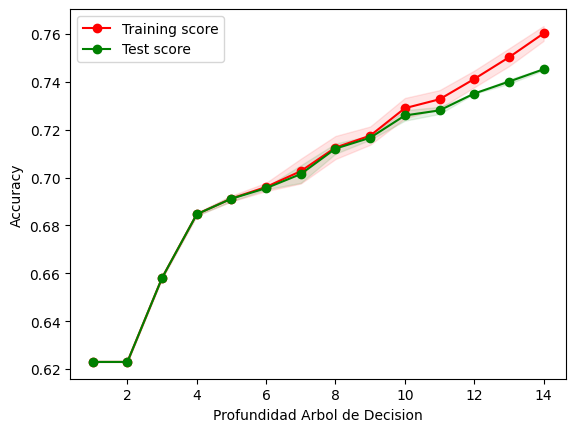

In [693]:
from sklearn.model_selection import cross_validate
arbol_scores = cross_validate(model, X, Y, scoring = ['accuracy'])
print(arbol_scores)
tree_train_scores_mean = []
tree_train_scores_std = []
tree_test_scores_mean = []
tree_test_scores_std = []

profundidades = np.arange(1,15,1)

for profundidad in profundidades:
    clf = DecisionTreeClassifier(max_depth=profundidad)
    tree_scores = cross_validate(clf, X, Y, cv=2, return_train_score=True, n_jobs = -1)
    
    tree_train_scores_mean.append(tree_scores['train_score'].mean())
    tree_train_scores_std.append(tree_scores['train_score'].std())
    
    tree_test_scores_mean.append(tree_scores['test_score'].mean())
    tree_test_scores_std.append(tree_scores['test_score'].std())

tree_train_scores_mean = np.array(tree_train_scores_mean)
tree_train_scores_std = np.array(tree_train_scores_std)
tree_test_scores_mean = np.array(tree_test_scores_mean)
tree_test_scores_std = np.array(tree_test_scores_std)
plt.fill_between(profundidades, tree_train_scores_mean - tree_train_scores_std,
                 tree_train_scores_mean + tree_train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(profundidades, tree_test_scores_mean - tree_test_scores_std,
                 tree_test_scores_mean + tree_test_scores_std, alpha=0.1, color="g")

plt.plot(profundidades, tree_train_scores_mean, 'o-', color="r",
         label="Training score")
plt.plot(profundidades, tree_test_scores_mean, 'o-', color="g",
         label="Test score")


plt.legend()
plt.ylabel('Accuracy')
plt.xlabel('Profundidad Arbol de Decision')
plt.show()

In [694]:
model = DecisionTreeClassifier(random_state=42, max_depth=10) #Utilizo la profundidad óptima calculada con la Cross Validation.
model.fit(X_Train, Y_Train)
y_train_pred = model.predict(X_Test)
y_train_pred

array([0, 1, 0, ..., 0, 1, 1], dtype=int64)

In [695]:
precision=precision_score(Y_Test,y_train_pred)
sensibilidad=recall_score(Y_Test,y_train_pred)
exatitud=accuracy_score(Y_Test,y_train_pred)
print(f' precision: {precision}sensibilidad {sensibilidad} exatitud {exatitud}')

 precision: 0.7505398219033853sensibilidad 0.8234879486225599 exatitud 0.7195853658536585


Comparación de Accuracy entre Árbol de decisión y Regresión Logística.

In [696]:
pipe_lr = Pipeline([('scl', StandardScaler()),
			('pca', PCA(n_components=2)),
			('clf', LogisticRegression(random_state=42))])

pipe_dt = Pipeline([('scl', StandardScaler()),
			('pca', PCA(n_components=2)),
			('clf', tree.DecisionTreeClassifier(random_state=42))])

In [697]:
pipelines = [pipe_lr, pipe_dt]
pipe_dict = {0: 'Regresión Logística', 1: 'Árbol de decisión'}

In [698]:
pipe_lr.fit(X_Train, Y_Train)
pipe_dt.fit(X_Train, Y_Train);

In [699]:
for idx, val in enumerate(pipelines):
	print('%s pipeline accuracy en test: %.3f' % (pipe_dict[idx], val.score(X_Test, Y_Test)))

Regresión Logística pipeline accuracy en test: 0.606
Árbol de decisión pipeline accuracy en test: 0.606


DECIDO POR EL Árbol de decisión

CREAMOS EL PIPELINE

In [700]:
import joblib

joblib.dump(model, 'DecisionTree_model.pkl', compress=1)

['DecisionTree_model.pkl']

In [701]:
DecisionTree_model = joblib.load('DecisionTree_model.pkl')

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [702]:
DecisionTree_model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=10, random_state=42)

In [704]:
DecisionTree_model.score(X_test, y_test)

0.7277642276422764

PASAMOS A HACER LA PREDICION DEL DATAFRAME hospitalizaciones_test

In [707]:
#Defino la X de hospitalizaciones_test
X_PRED=hospitalizaciones_test.iloc[:,0:11] 

In [709]:
pred = DecisionTree_model.predict(X_PRED)

In [710]:
hospitalizaciones_test['pred']=pred
hospitalizaciones_test=hospitalizaciones_test['pred']

In [711]:
hospitalizaciones_test.to_csv('LeoBalleis.csv',index=False)